In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
plt.style.use("seaborn-poster")
data_exploitable = pd.read_excel('./data_exploitable.xls', index_col=0)

In [8]:
#Sigma Clipping 
q = np.percentile(data_exploitable.P13_POP, [25, 50, 75])
mv = q[1]
sigma = 0.74 * (q[2] - q[0])

In [9]:
data_exploitable_oringinal = data_exploitable.copy()
data_exploitable = data_exploitable_oringinal[( data_exploitable.P13_POP > mv - 5.0 * sigma )  & (data_exploitable.P13_POP < mv + 5.0 * sigma)]

## Analyse en composantes principales

In [10]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [11]:
target = data_exploitable_oringinal["voting_result"]

In [12]:
data = data_exploitable_oringinal.iloc[:, 43:60]

data_2 = data_exploitable_oringinal.select_dtypes(exclude='object')
data_2 = data_2.drop(columns=["Abstentions", "Blancs et nuls", "Choix A", "Choix B", "Percentage_ABSTENTION_VS_POP_TOTAL",
                          "Percentage_BlANC_NUL_VS_POP_TOTAL",
                          "Percentage_CHOIX_A_VS_POP_TOTAL",
                          "Percentage_CHOIX_B_VS_POP_TOTAL", "voting_result"])
data_2 = data_2.loc[:,"Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL": "Percentage_INSCRITE_VS_POP_TOTAL"]
data_2 = pd.concat([data_2, data_exploitable_oringinal["MED13"].to_frame(), 
                   data_exploitable_oringinal["P13_POP"]], axis=1)
# data_3 = data_exploitable_oringinal.select_dtypes(exclude='object')
# data_3 = data_3.drop(columns=[""])

In [13]:
scaler = StandardScaler()
data_temp = scaler.fit_transform(data_2)


In [14]:
data_temp = pd.DataFrame(data_temp, columns=data_2.columns)

In [15]:
data_mod = data_2
data= data_temp


In [16]:
#sns.pairplot(data)

In [17]:
data.shape

(30867, 19)

In [18]:
pca = PCA(n_components=2)
data_2D = pca.fit_transform(data)


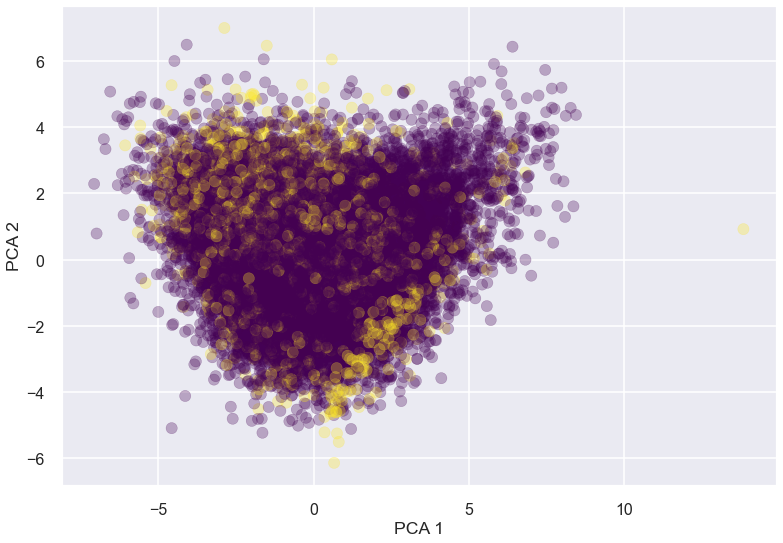

le part de variance expliquée est 0.32


In [19]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_2D[:,0], data_2D[:,1], c = target, cmap=plt.cm.viridis_r, alpha=0.3)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

plt.show()

print("le part de variance expliquée est", round(pca.explained_variance_ratio_.sum(), 2))

**Si on limite pas le nombre de composantes pricipales**

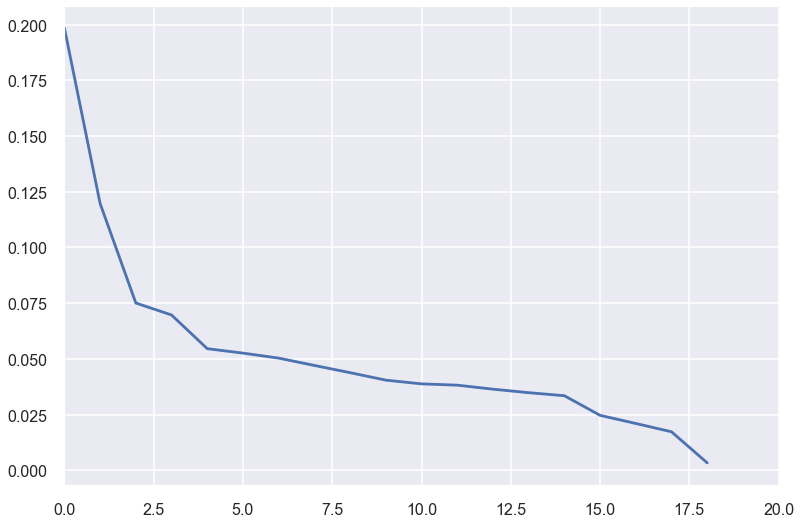

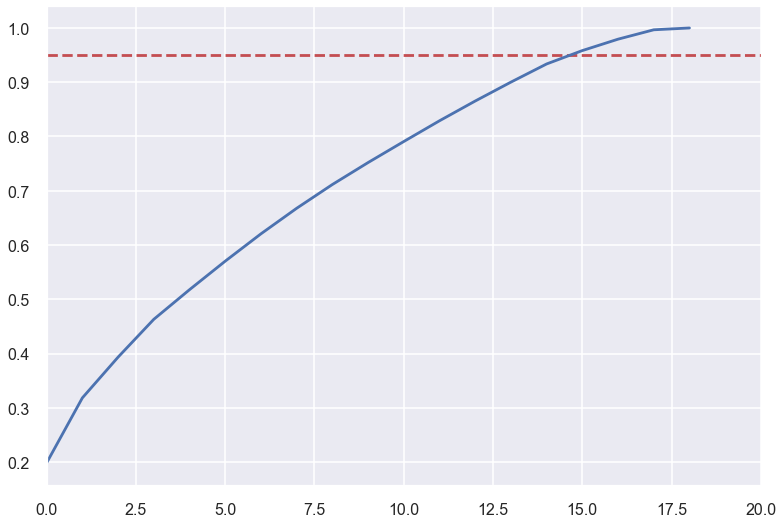

In [20]:
pca = PCA()
pca.fit(data)

plt.figure()
plt.xlim(0,20)
plt.plot(pca.explained_variance_ratio_)

plt.figure()
plt.xlim(0,20)
plt.axhline(y = 0.95, c="r", linestyle="--")
plt.plot(pca.explained_variance_ratio_.cumsum())




In [21]:
pca = PCA(n_components= 0.95)
pca.fit(data)
print("Nombre de composantes retenues : ", pca.n_components_)

Nombre de composantes retenues :  16


In [22]:
pca.components_.shape

(16, 19)

In [23]:
vars(pca)

{'n_components': 0.95,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 'feature_names_in_': array(['Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N0_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N1_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N2_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N3_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N4_V

***
### analyse discriminante linéaire(LDA) 

In [24]:
lda =LDA()
data_lda = lda.fit_transform(data, target)
data_lda.shape

(30867, 1)

**Le LDA n'est adaptée que dans le cas de problèmes de classification supervisée avec des features continues où le nombre de classes à prédire est suffisamment important. C'est un algorithme nettement moins polyvalent que la PCA.**

In [25]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.scatter(data_2D[:,0], data_2D[:,1], c = target, cmap=plt.cm.viridis_r, alpha=0.3)
# plt.show()

# fig= plt.figure()

# ax = fig.add_subplot(111)
# ax.scatter(data_lda[:,0], data_lda[:,0], c = target, cmap=plt.cm.Spectral)
# ax.set_xlabel('LD1')
# ax.set_xlabel('LD2')

***
***

## Random forest classifier

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

**modélisation sans prendre en compte de l'analyse PCA**  

In [27]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30867 entries, 0 to 30866
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL     30867 non-null  float64
 1   Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL  30867 non-null  float64
 2   Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL  30867 non-null  float64
 3   Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL  30867 non-null  float64
 4   Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL  30867 non-null  float64
 5   Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL  30867 non-null  float64
 6   Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL  30867 non-null  float64
 7   Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL  30867 non-null  float64
 8   Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL  30867 non-null  float64
 9   Percen

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_mod, target, test_size=0.25, random_state=111)

In [31]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [32]:
X_train_scaled.describe()

,Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N0_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N1_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N2_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N3_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N4_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N5_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N6_VS_POP_TOTAL,Percentage_INSCRITE_VS_POP_TOTAL,MED13,P13_POP
count,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04
mean,-3.657348e-15,-1.761946e-16,-8.603719e-17,-1.089649e-16,7.356726e-18,6.334086e-17,-1.420846e-16,-2.795364e-16,-2.619887e-16,7.043082e-17,-6.935177e-17,2.625402e-16,-1.256506e-16,2.230997e-17,1.761969e-17,-2.731173e-16,-4.827959e-16,9.377476e-16,-1.781392e-17
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-6.685475e+00,-7.263510e-01,-1.444036e+00,-1.276992e+00,-2.408769e+00,-3.234961e+00,-2.453848e+00,-2.893229e+00,-2.368492e+00,-1.705287e+00,-1.626214e+00,-1.545287e+00,-3.115602e+00,-2.740049e+00,-2.074158e+00,-1.625861e+00,-6.683854e+00,-3.600528e+00,-1.132736e-01
25%,-6.668189e-01,-7.057348e-01,-6.255979e-01,-6.733249e-01,-6.820634e-01,-5.769663e-01,-6.846434e-01,-6.823436e-01,-6.249549e-01,-6.752194e-01,-6.666001e-01,-6.018336e-01,-5.448401e-01,-5.422978e-01,-6.301689e-01,-6.812083e-01,-6.378857e-01,-6.315784e-01,-1.030470e-01
50%,-3.510716e-02,-3.544480e-01,-1.439589e-01,-2.069735e-01,-1.958977e-02,2.377868e-02,-6.439819e-02,-1.171647e-01,-6.222152e-02,-1.285498e-01,-1.543894e-01,-1.063127e-01,-3.287517e-02,-5.384261e-02,-4.225141e-02,-1.562155e-01,-3.207583e-02,-1.481355e-01,-8.682555e-02
75%,6.334793e-01,2.633906e-01,4.616496e-01,4.588291e-01,6.536865e-01,5.685514e-01,5.879636e-01,5.661290e-01,5.266746e-01,5.283155e-01,4.811713e-01,4.588850e-01,5.075323e-01,4.795990e-01,5.502729e-01,5.023527e-01,6.163257e-01,4.561935e-01,-4.421483e-02
max,4.126902e+00,1.025744e+01,9.987824e+00,8.712588e+00,6.767748e+00,9.872714e+00,6.684788e+00,5.858193e+00,1.064706e+01,8.791145e+00,7.407314e+00,8.511730e+00,9.283387e+00,1.046556e+01,8.950485e+00,8.591757e+00,2.711700e+00,9.069853e+00,1.309242e+02


In [25]:
#Mise en place d'un random forest classifier
clf_rf = RandomForestClassifier()

In [26]:
clf_rf.fit(X_train_scaled,y_train)
y_pred_rf=clf_rf.predict(X_test_scaled)

In [27]:
#Matrice de confusion pour le Random Forest
pd.crosstab(y_test, y_pred_rf, rownames = ['Classe réelle'], colnames = ['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,52,844
1,31,5247


In [28]:
clf_rf.score(X_test_scaled, y_test).round(4)

0.8583

**Un GridSearch est nécessaire afin de trouver les meilleurs hyperparamères.**

In [71]:
#Gridsearch sur RandomForest
param_grid_rf  = [{'n_estimators': [10, 50, 100],
                   'min_samples_leaf': [1, 3, 5],
                   'max_features': ['sqrt', 'log2']}]

gcv_rf = GridSearchCV(clf_rf, param_grid_rf, cv=3)

gcv_results_rf=gcv_rf.fit(X_train_scaled, y_train)

gcv_results_rf.best_params_

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}

In [30]:
clf_rf=RandomForestClassifier(max_features='log2', min_samples_leaf=3, n_estimators=100)
clf_rf.fit(X_train_scaled, y_train)
y_pred_rf=clf_rf.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,45,851
1,25,5253


In [31]:
score_rf=clf_rf.score(X_test_scaled,y_test)
print('Score of opimized Random Forest:',score_rf)

Score of opimized Random Forest: 0.858114674441205


In [32]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.64      0.05      0.09       896
           1       0.86      1.00      0.92      5278

    accuracy                           0.86      6174
   macro avg       0.75      0.52      0.51      6174
weighted avg       0.83      0.86      0.80      6174



In [33]:
target.value_counts(normalize=True)

1    0.855088
0    0.144912
Name: voting_result, dtype: float64

In [34]:
print("le nombre de communes ayant choisi B est", y_train.sum())
print("le nombre de communes ayant choisi A est", len(y_train) - y_train.sum())
print("l'échantillon d'apprentissage contient une disparité entre les deux choix à prédire !")

le nombre de communes ayant choisi B est 21116
le nombre de communes ayant choisi A est 3577
l'échantillon d'apprentissage contient une disparité entre les deux choix à prédire !


## **On doit effecuer un sur-échantillonnage (Oversampling) ou un sous-échantillonnage (Undersampling)**

### oversampling test

In [35]:
target.value_counts()

1    26394
0     4473
Name: voting_result, dtype: int64

In [76]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids


In [38]:
print(classification_report_imbalanced(y_test, y_pred_rf))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.64      0.05      1.00      0.09      0.22      0.05       896
          1       0.86      1.00      0.05      0.92      0.22      0.05      5278

avg / total       0.83      0.86      0.19      0.80      0.22      0.05      6174



**Over sampelling using Random Over Sampler and SMOTE**

In [39]:
X_train.shape

(24693, 19)

In [53]:
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train_scaled, y_train)
print("Classes échantillon oversampled :", dict(pd.DataFrame(y_ro).value_counts()))

# SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train_scaled, y_train)
print("Classes échantillon SMOTE :", dict(pd.DataFrame(y_sm).value_counts()))

Classes échantillon oversampled : {(0,): 21116, (1,): 21116}
Classes échantillon SMOTE : {(0,): 21116, (1,): 21116}


**entrainer le modèle Randon Forest avec Random Over Sampler**

In [74]:
clf_rf_over_sampled = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_rf_over_sampled.fit(X_ro, y_ro)
y_pred_rf_over_sampled = clf_rf_over_sampled.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_over_sampled,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,322,777
1,108,6510


In [75]:
print(classification_report(y_test,y_pred_rf_over_sampled))

              precision    recall  f1-score   support

           0       0.75      0.29      0.42      1099
           1       0.89      0.98      0.94      6618

    accuracy                           0.89      7717
   macro avg       0.82      0.64      0.68      7717
weighted avg       0.87      0.89      0.86      7717



**entrainer le modèle Randon Forest avec SMOTE**

In [72]:
clf_rf_SMOTE = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_rf_SMOTE.fit(X_sm, y_sm)
y_pred_rf_SMOTE = clf_rf_SMOTE.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_SMOTE,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,630,469
1,885,5733


In [73]:
print(classification_report(y_test,y_pred_rf_SMOTE))

              precision    recall  f1-score   support

           0       0.42      0.57      0.48      1099
           1       0.92      0.87      0.89      6618

    accuracy                           0.82      7717
   macro avg       0.67      0.72      0.69      7717
weighted avg       0.85      0.82      0.84      7717



**courbe lift cumulée**

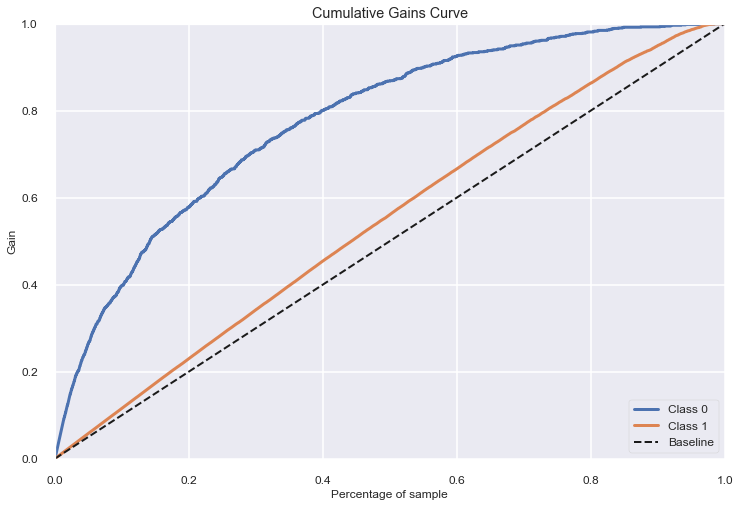

In [51]:
import scikitplot as skplot
y_probas = clf_rf_SMOTE.predict_proba(X_test_scaled)
skplot.metrics.plot_cumulative_gain(y_test, y_probas, figsize=(12, 8))
plt.show()

### undersampling test

**Under sampelling using Random Under Sampler and Cluster Centroids**

In [77]:
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train_scaled, y_train)
print("Classes échantillon underssampled :", dict( pd.DataFrame(y_ru).value_counts() ))

#Centroides
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_train_scaled, y_train)
print("Classes échantillon cluster centroids :", dict( pd.DataFrame(y_cc).value_counts() ))

Classes échantillon underssampled : {(0,): 3374, (1,): 3374}
Classes échantillon cluster centroids : {(0,): 3374, (1,): 3374}


**entrainer le modèle Randon Forest avec Random Under Sampler**

In [78]:
clf_rf_under_sampled = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_rf_under_sampled.fit(X_ru, y_ru)
y_pred_rf_under_sampled = clf_rf_under_sampled.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_under_sampled,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,790,309
1,2222,4396


In [80]:
print(classification_report(y_test,y_pred_rf_under_sampled))

              precision    recall  f1-score   support

           0       0.26      0.72      0.38      1099
           1       0.93      0.66      0.78      6618

    accuracy                           0.67      7717
   macro avg       0.60      0.69      0.58      7717
weighted avg       0.84      0.67      0.72      7717



**entrainer le modèle Randon Forest avec Cluster Centroids**

In [82]:
clf_rf_cc = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_rf_cc.fit(X_cc, y_cc)
y_pred_rf_cc = clf_rf_cc.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_cc, rownames=['réel'],colnames=['prediction'])


prediction,0,1
réel,,
0,831,268
1,3246,3372


In [83]:
print(classification_report(y_test,y_pred_rf_cc))

              precision    recall  f1-score   support

           0       0.20      0.76      0.32      1099
           1       0.93      0.51      0.66      6618

    accuracy                           0.54      7717
   macro avg       0.57      0.63      0.49      7717
weighted avg       0.82      0.54      0.61      7717



## le modèle Randon Forest avec SMOTE est plus performant. 

Cepandant, la spécificité n'est toujours pas parfaite ! Afin d'améliorer le modèle, on peut par example changer le seuil de probabilité de prédiction pour la classe 0.

In [105]:
threshold = 0.52
probs  = clf_rf_SMOTE.predict_proba(X_test_scaled)
pred_class = (probs[:,1] >= threshold).astype("int")
pd.crosstab(y_test, pred_class, rownames=['réel'],colnames=['prediction'])


prediction,0,1
réel,,
0,646,453
1,941,5677


In [106]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.41      0.59      0.48      1099
           1       0.93      0.86      0.89      6618

    accuracy                           0.82      7717
   macro avg       0.67      0.72      0.69      7717
weighted avg       0.85      0.82      0.83      7717



### Tester un autre modèle de learning : AdaBoost

In [107]:
from sklearn.ensemble import AdaBoostClassifier

In [109]:
ac = AdaBoostClassifier(base_estimator=clf_rf_SMOTE, n_estimators=400)
ac.fit(X_sm, y_sm)
ac.score(X_test_scaled, y_test)

0.8236361280290269

In [111]:
y_pred_ab = ac.predict(X_test_scaled)
pd.crosstab(y_test, y_test_ab, rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,646,453
1,908,5710


In [112]:
print(classification_report(y_test,y_pred_ab))

              precision    recall  f1-score   support

           0       0.42      0.59      0.49      1099
           1       0.93      0.86      0.89      6618

    accuracy                           0.82      7717
   macro avg       0.67      0.73      0.69      7717
weighted avg       0.85      0.82      0.84      7717



**Les prédictions sont un peu plus performantes!**

## tester Voting Classifier

In [119]:
from sklearn import neighbors
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

In [117]:
clf_knn_chosen = neighbors.KNeighborsClassifier(metric = 'minkowski', n_neighbors = 1)
clf_rf_chosen  = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_svm_chosen = svm.SVC(C = 1, gamma = 0.001, kernel = 'linear')
clf_gb_chosen = GradientBoostingClassifier(learning_rate = 0.01, loss ='deviance', n_estimators=250)

In [121]:
voting_clf = VotingClassifier(estimators=[('knn', clf_knn_chosen), ('rf', clf_rf_chosen), ('svm', clf_svm_chosen), ('gb',clf_gb_chosen), ('adaboost', ac)], voting='hard')
voting_clf.fit(X_sm, y_sm)
y_pred_voting_clf=voting_clf.predict(X_test_scaled)


In [122]:
pd.crosstab(y_test, y_pred_voting_clf, rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,691,408
1,1101,5517


In [123]:
print(classification_report(y_test,y_pred_voting_clf))

              precision    recall  f1-score   support

           0       0.39      0.63      0.48      1099
           1       0.93      0.83      0.88      6618

    accuracy                           0.80      7717
   macro avg       0.66      0.73      0.68      7717
weighted avg       0.85      0.80      0.82      7717



#### sauvegarder les modèles entraînés

In [128]:
import pickle

In [135]:
model_list_name = ["clf_rf", "clf_rf_over_sampled", "clf_rf_SMOTE", "clf_rf_under_sampled", "clf_rf_cc", "ac", "voting_clf"]
model_list = [clf_rf, clf_rf_over_sampled, clf_rf_SMOTE, clf_rf_under_sampled, clf_rf_cc, ac, voting_clf]

for (m, n) in zip(model_list, model_list_name):
    pickle.dump(m, open(n+'.pkl', 'wb'))
   

## Interprétabilité du modèle Random Forest avec SHAP

In [124]:
import shap
import skater
import time

2022-02-17 01:18:56.679512: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/wgong/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-02-17 01:18:56.679533: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [125]:
explainer = shap.TreeExplainer(clf_rf_SMOTE)
shap_values = explainer.shap_values(X_test_scaled)

In [189]:
y_test

1668     1
17330    1
26740    1
8223     1
5703     0
        ..
19529    1
6060     1
30349    1
6464     0
5702     1
Name: voting_result, Length: 7717, dtype: int64

In [173]:
pd.DataFrame(shap_values[0], columns=X_test_scaled.columns)

,Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N0_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N1_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N2_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N3_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N4_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N5_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N6_VS_POP_TOTAL,Percentage_INSCRITE_VS_POP_TOTAL,MED13,P13_POP
0,-0.022842,0.000671,0.003818,-0.002709,-0.000805,-0.009203,0.007137,-0.033847,-0.005490,0.021198,0.013826,0.005349,-0.006414,-0.000826,-0.004450,-0.086472,-0.056549,0.039539,0.007789
1,-0.047003,0.008161,0.003998,-0.009531,0.000413,-0.005580,-0.087469,-0.057286,-0.002967,0.026379,0.011475,0.002493,-0.004497,-0.002269,-0.017449,-0.027093,-0.000514,-0.138932,-0.032609
2,-0.076156,0.007261,0.004163,0.009165,0.009497,-0.003607,0.008510,-0.048567,-0.005103,0.011774,0.011193,-0.008566,-0.002300,-0.007915,-0.014968,-0.032710,-0.050622,-0.140928,-0.020400
3,0.071195,0.009944,-0.016252,0.003017,-0.006504,-0.007637,-0.013687,0.029849,-0.031114,-0.087019,-0.059257,-0.003542,-0.011518,-0.000846,-0.007933,-0.016470,-0.058256,-0.015583,0.001333
4,-0.090720,-0.007026,-0.003451,-0.009674,-0.009474,-0.011077,-0.067787,-0.048707,-0.002754,-0.008442,-0.007658,-0.009387,0.012073,-0.005028,0.019787,0.052648,-0.040738,-0.001852,-0.021015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,-0.085496,0.000737,-0.001508,-0.014159,-0.006077,-0.000001,-0.032837,-0.047725,-0.011838,0.003066,-0.005807,-0.003932,-0.009143,-0.003757,-0.010387,-0.012788,-0.037798,-0.191689,-0.029140
7713,-0.080310,-0.007300,0.002574,-0.009501,0.005339,-0.000870,0.021036,-0.021950,-0.001147,-0.037802,-0.011654,-0.016232,-0.008975,-0.003325,-0.003897,-0.038212,-0.006219,-0.202802,-0.029033
7714,0.033808,-0.008830,0.002324,-0.011774,-0.011329,-0.017708,-0.044796,0.017606,-0.004748,-0.023172,0.014718,-0.030702,-0.007369,0.001690,-0.008629,0.037296,0.005324,-0.346463,-0.007528
7715,0.086259,0.057852,0.030834,0.006821,-0.002492,0.011326,0.054948,0.061811,0.033330,0.089201,-0.003030,0.013357,0.004059,0.011577,0.011993,0.054099,0.025493,-0.088451,0.040731


In [174]:
pd.DataFrame(shap_values[1], columns=X_test_scaled.columns)

,Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N0_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N1_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N2_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N3_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N4_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N5_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N6_VS_POP_TOTAL,Percentage_INSCRITE_VS_POP_TOTAL,MED13,P13_POP
0,0.022842,-0.000671,-0.003818,0.002709,0.000805,0.009203,-0.007137,0.033847,0.005490,-0.021198,-0.013826,-0.005349,0.006414,0.000826,0.004450,0.086472,0.056549,-0.039539,-0.007789
1,0.047003,-0.008161,-0.003998,0.009531,-0.000413,0.005580,0.087469,0.057286,0.002967,-0.026379,-0.011475,-0.002493,0.004497,0.002269,0.017449,0.027093,0.000514,0.138932,0.032609
2,0.076156,-0.007261,-0.004163,-0.009165,-0.009497,0.003607,-0.008510,0.048567,0.005103,-0.011774,-0.011193,0.008566,0.002300,0.007915,0.014968,0.032710,0.050622,0.140928,0.020400
3,-0.071195,-0.009944,0.016252,-0.003017,0.006504,0.007637,0.013687,-0.029849,0.031114,0.087019,0.059257,0.003542,0.011518,0.000846,0.007933,0.016470,0.058256,0.015583,-0.001333
4,0.090720,0.007026,0.003451,0.009674,0.009474,0.011077,0.067787,0.048707,0.002754,0.008442,0.007658,0.009387,-0.012073,0.005028,-0.019787,-0.052648,0.040738,0.001852,0.021015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,0.085496,-0.000737,0.001508,0.014159,0.006077,0.000001,0.032837,0.047725,0.011838,-0.003066,0.005807,0.003932,0.009143,0.003757,0.010387,0.012788,0.037798,0.191689,0.029140
7713,0.080310,0.007300,-0.002574,0.009501,-0.005339,0.000870,-0.021036,0.021950,0.001147,0.037802,0.011654,0.016232,0.008975,0.003325,0.003897,0.038212,0.006219,0.202802,0.029033
7714,-0.033808,0.008830,-0.002324,0.011774,0.011329,0.017708,0.044796,-0.017606,0.004748,0.023172,-0.014718,0.030702,0.007369,-0.001690,0.008629,-0.037296,-0.005324,0.346463,0.007528
7715,-0.086259,-0.057852,-0.030834,-0.006821,0.002492,-0.011326,-0.054948,-0.061811,-0.033330,-0.089201,0.003030,-0.013357,-0.004059,-0.011577,-0.011993,-0.054099,-0.025493,0.088451,-0.040731


In [146]:
with open('shap_explainer_et_shap_values.pkl', 'wb') as f:
        pickle.dump([explainer, shap_values], f)
    

***
**Charger les pickles**

In [4]:
import pickle
import shap
with open('clf_rf_SMOTE.pkl', 'rb') as f:
    clf_rf_SMOTE = pickle.load(f)
with open('shap_explainer_et_shap_values.pkl', 'rb') as f:
    explainer, shap_values = pickle.load(f)
    


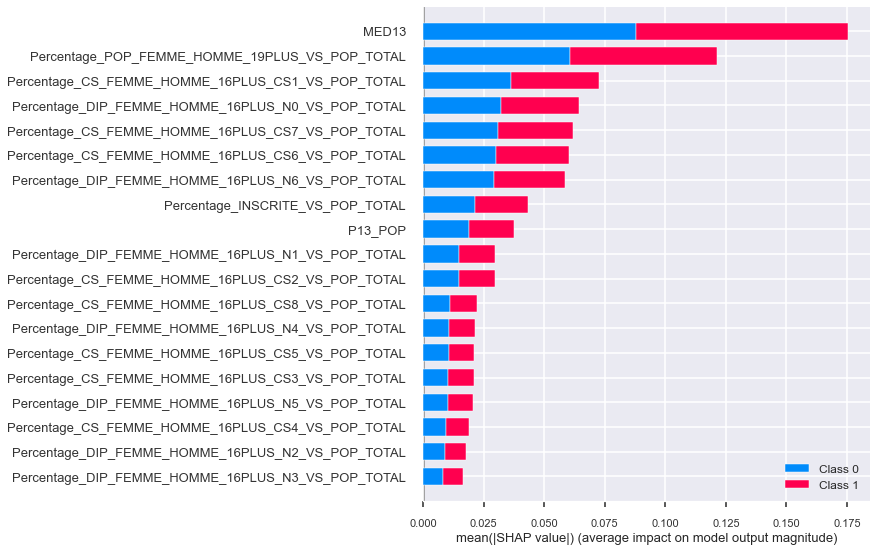

In [33]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

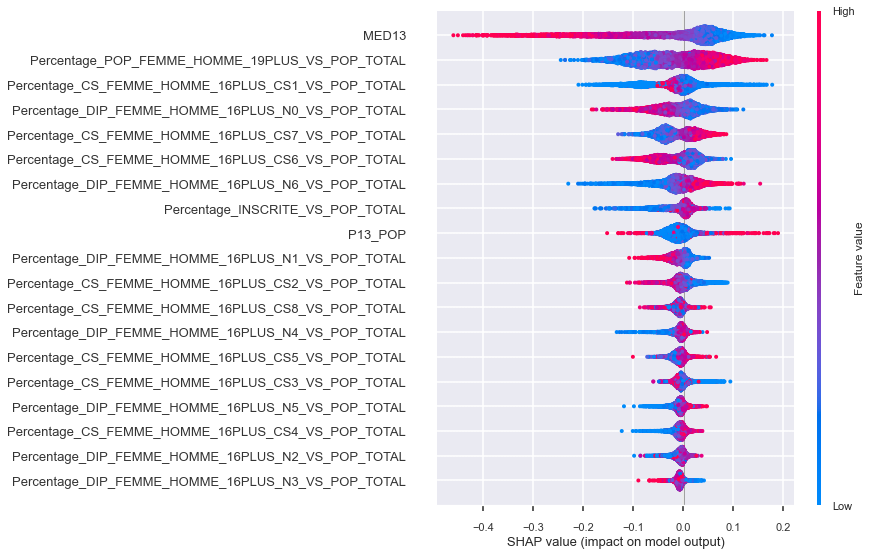

In [34]:
shap.summary_plot(shap_values[0], X_test_scaled.values, feature_names = X_test.columns) # choix A

* L'objectif est d'expliquer la différence entre la prévision réelle et la prévions moyenne. 
* La valeur de Shapley est la moyenne (pondérée) des contributions marginales. SHAP est une amélioration des valeurs de Shapley. SHAP attribue à chaque variable une valeur d'importance pour une prédiction particulière. 
* revenu médian a une influences très important sur le vote. Notamment pour les communes riches, même si elles ne sont pas très nombreuse.
* CS1 a une influence communes ayant chois A. 


In [35]:
shap.initjs()

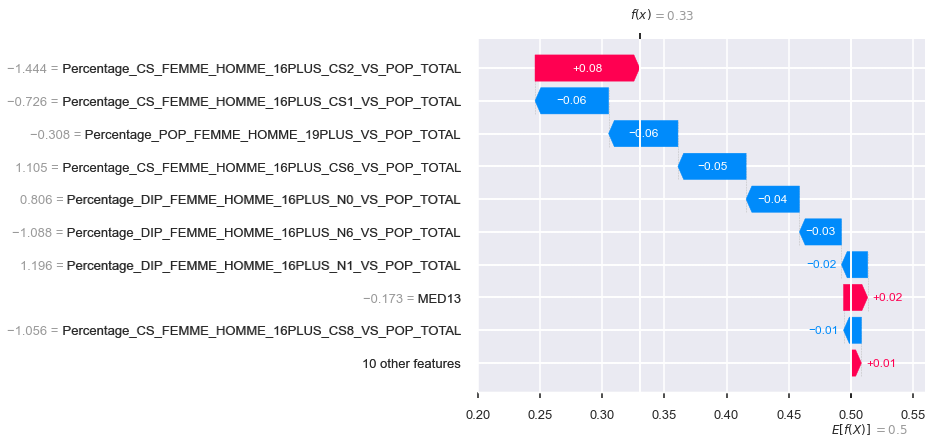

In [36]:
row = 1668 # choix B
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test_scaled.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

In [37]:
X_test_scaled

,Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N0_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N1_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N2_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N3_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N4_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N5_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N6_VS_POP_TOTAL,Percentage_INSCRITE_VS_POP_TOTAL,MED13,P13_POP
0,-0.203982,-0.226482,3.076913,-0.825218,0.497014,1.499169,-0.719586,-0.374084,-0.042407,-0.874566,-0.935119,0.291546,0.309589,0.762354,1.125164,-1.193692,-0.806820,-0.544347,-0.081947
1,-0.562497,-0.499621,-0.813081,0.362324,0.597916,0.732871,1.586534,-1.025470,-1.137587,-0.729652,-1.213760,-0.048226,0.916809,0.408554,-0.127505,-0.069214,-0.191878,0.602525,-0.086238
2,-1.247107,-0.544366,-0.684381,1.848029,3.541880,0.212100,-0.617095,-2.046646,-0.251377,-0.625157,-1.129629,-0.761623,-0.832098,0.131802,-0.476164,-0.121900,-2.117085,1.011939,-0.078362
3,1.300227,-0.347696,0.487820,-0.478474,-0.482760,-0.428417,0.173586,1.510475,-0.998026,0.916703,2.368993,-0.458244,0.423753,0.247673,-1.088991,-0.582767,-1.056010,-0.064521,-0.060730
4,-1.829360,0.312033,3.251673,-0.338518,0.043443,-0.455713,3.932582,-2.893229,-1.563158,-0.164514,0.262759,1.435708,-1.982610,-0.282082,2.991380,1.674687,-1.115033,-0.026642,-0.111275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,-1.071259,-0.446786,-0.277055,0.491670,-0.123423,1.427268,0.411858,-1.023730,0.287561,-0.543781,-0.100505,-0.341423,-0.431283,0.656987,-0.437600,0.115813,-0.868503,1.262078,-0.092291
7713,-0.730706,0.032156,-0.388630,-0.342184,0.948286,1.251252,-1.105431,-0.353754,-0.710637,0.422906,0.380820,-1.149373,0.164763,0.176226,0.616909,-0.679016,-0.286904,1.277849,-0.091939
7714,0.729231,0.156275,-0.215927,-0.080438,-0.805400,-1.054320,0.329980,1.383781,0.027376,0.259199,-0.823401,-1.545287,-0.467234,1.786706,0.078695,1.460151,0.841384,1.375306,-0.101813
7715,1.230000,-0.613111,-0.309566,0.585679,-0.302289,0.122330,-1.139489,1.637141,-0.295820,-0.898753,-0.060610,0.535290,-0.446759,-0.095272,0.312290,1.311240,1.242728,0.959291,-0.038102


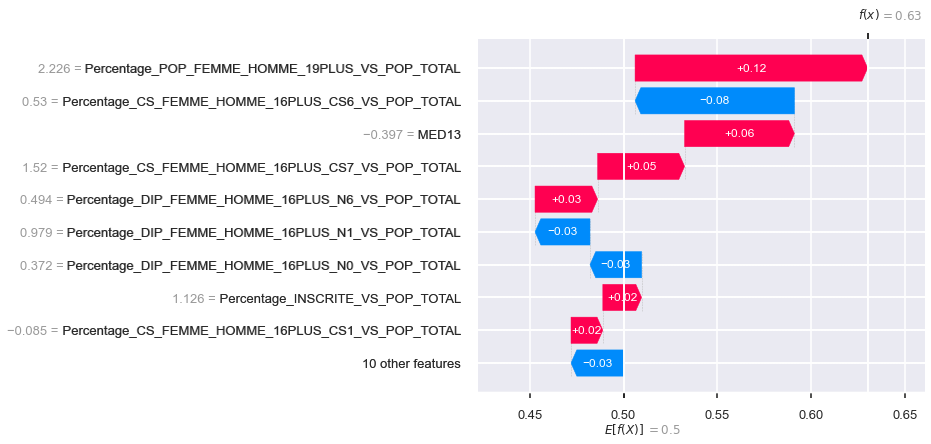

In [38]:
row = 5703 # choix A
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test_scaled.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

In [39]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL     7717 non-null   float64
 1   Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL  7717 non-null   float64
 2   Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL  7717 non-null   float64
 3   Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL  7717 non-null   float64
 4   Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL  7717 non-null   float64
 5   Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL  7717 non-null   float64
 6   Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL  7717 non-null   float64
 7   Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL  7717 non-null   float64
 8   Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL  7717 non-null   float64
 9   Percenta

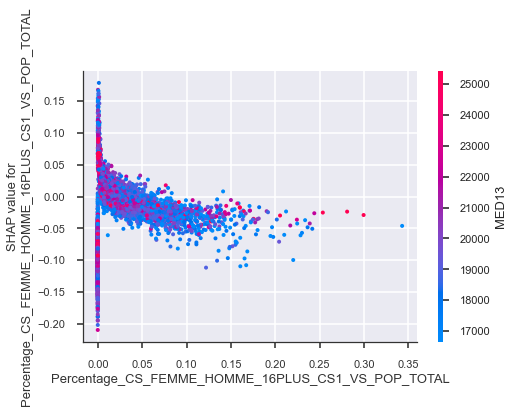

In [40]:
shap.dependence_plot("Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL", shap_values[0], X_test, interaction_index="MED13")

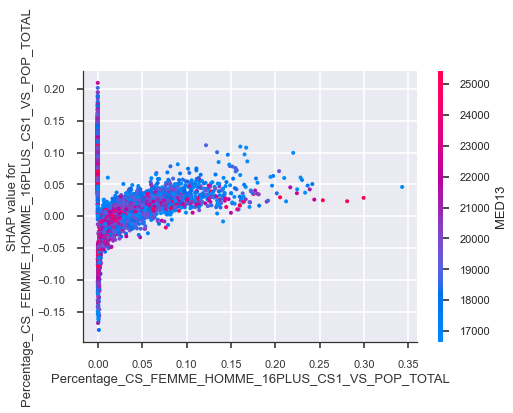

In [41]:
shap.dependence_plot("Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL", shap_values[1], X_test, interaction_index="MED13")

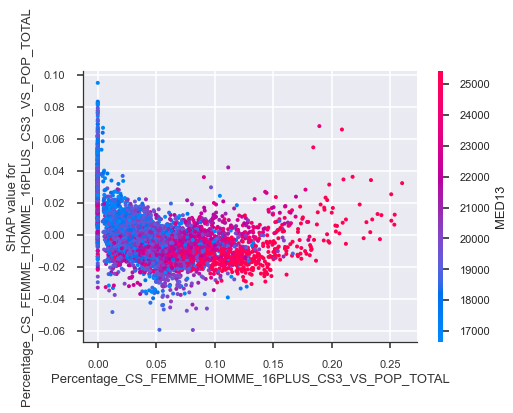

In [42]:
shap.dependence_plot("Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL", shap_values[0], X_test, interaction_index="MED13")

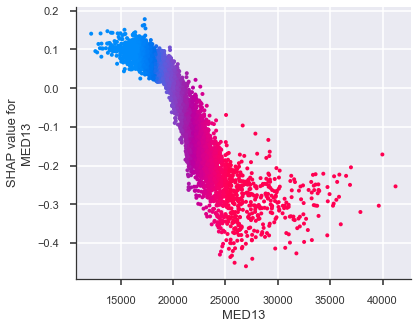

In [43]:
shap.dependence_plot("MED13", shap_values[0], X_test, interaction_index="MED13") # Choix A

In [52]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:10], X_test[:10])